In [1]:
import numpy as np
from sklearn import datasets

# загрузка датасета
iris = datasets.load_iris()

In [8]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
import pandas as pd

data = pd.DataFrame(
    {
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
    }
)

In [30]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.442765
petal length (cm)    0.424646
sepal length (cm)    0.095042
sepal width (cm)     0.037547
dtype: float64

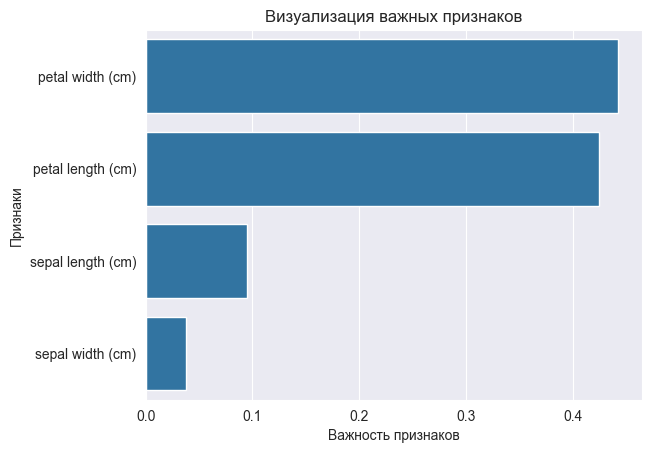

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = data[['petal length', 'petal width','sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=85)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9619047619047619


In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [14]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
import pandas as pd

df = pd.DataFrame(
    {
        'sepal length (cm)': iris.data[:, 0],
        'sepal width (cm)': iris.data[:, 1],
        'petal length (cm)': iris.data[:, 2],
        'petal width (cm)': iris.data[:, 3],
        'target': iris.target
    }
)
df['name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


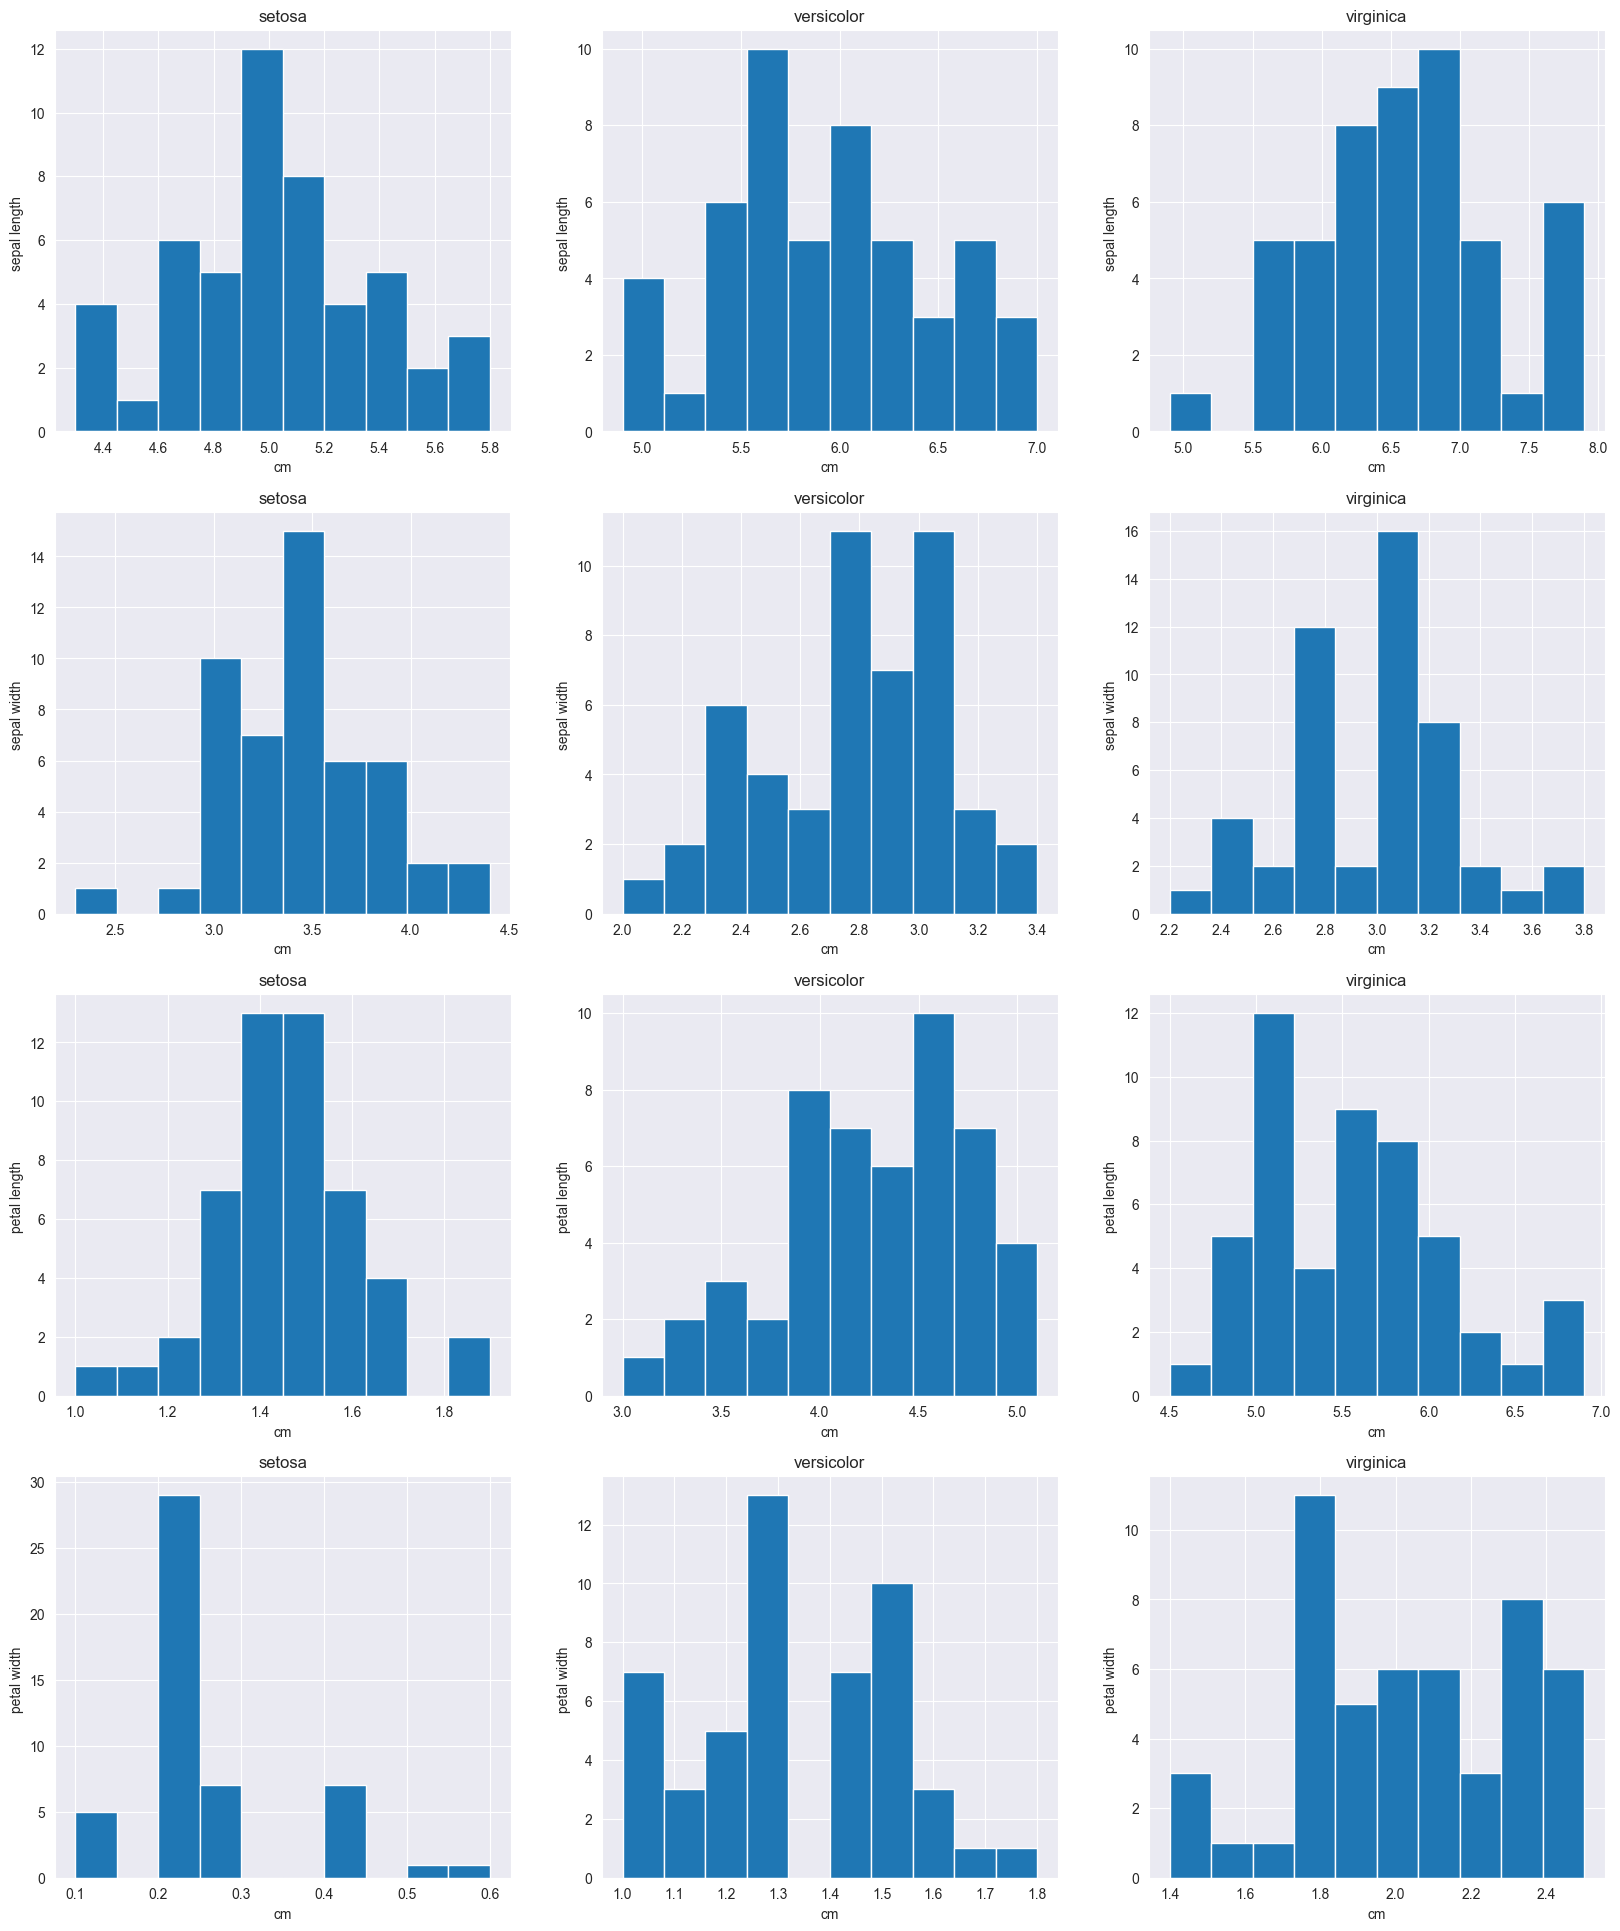

In [13]:
from matplotlib import pyplot as plt

plot_number = 0
plt.figure(figsize=(20, 24))

for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(df[df.name == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])

In [25]:
corrs = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

In [20]:
corrs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.941906,0.976054,0.963754
sepal width (cm),-0.941906,1.000000,-0.992151,-0.994843
petal length (cm),0.976054,-0.992151,1.000000,0.998029
petal width (cm),0.963754,-0.994843,0.998029,1.000000


In [45]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
# feature_imp = pd.Series(clf_rf.feature_importances_, index=iris.feature_names).sort_values()
y_pred = clf_rf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

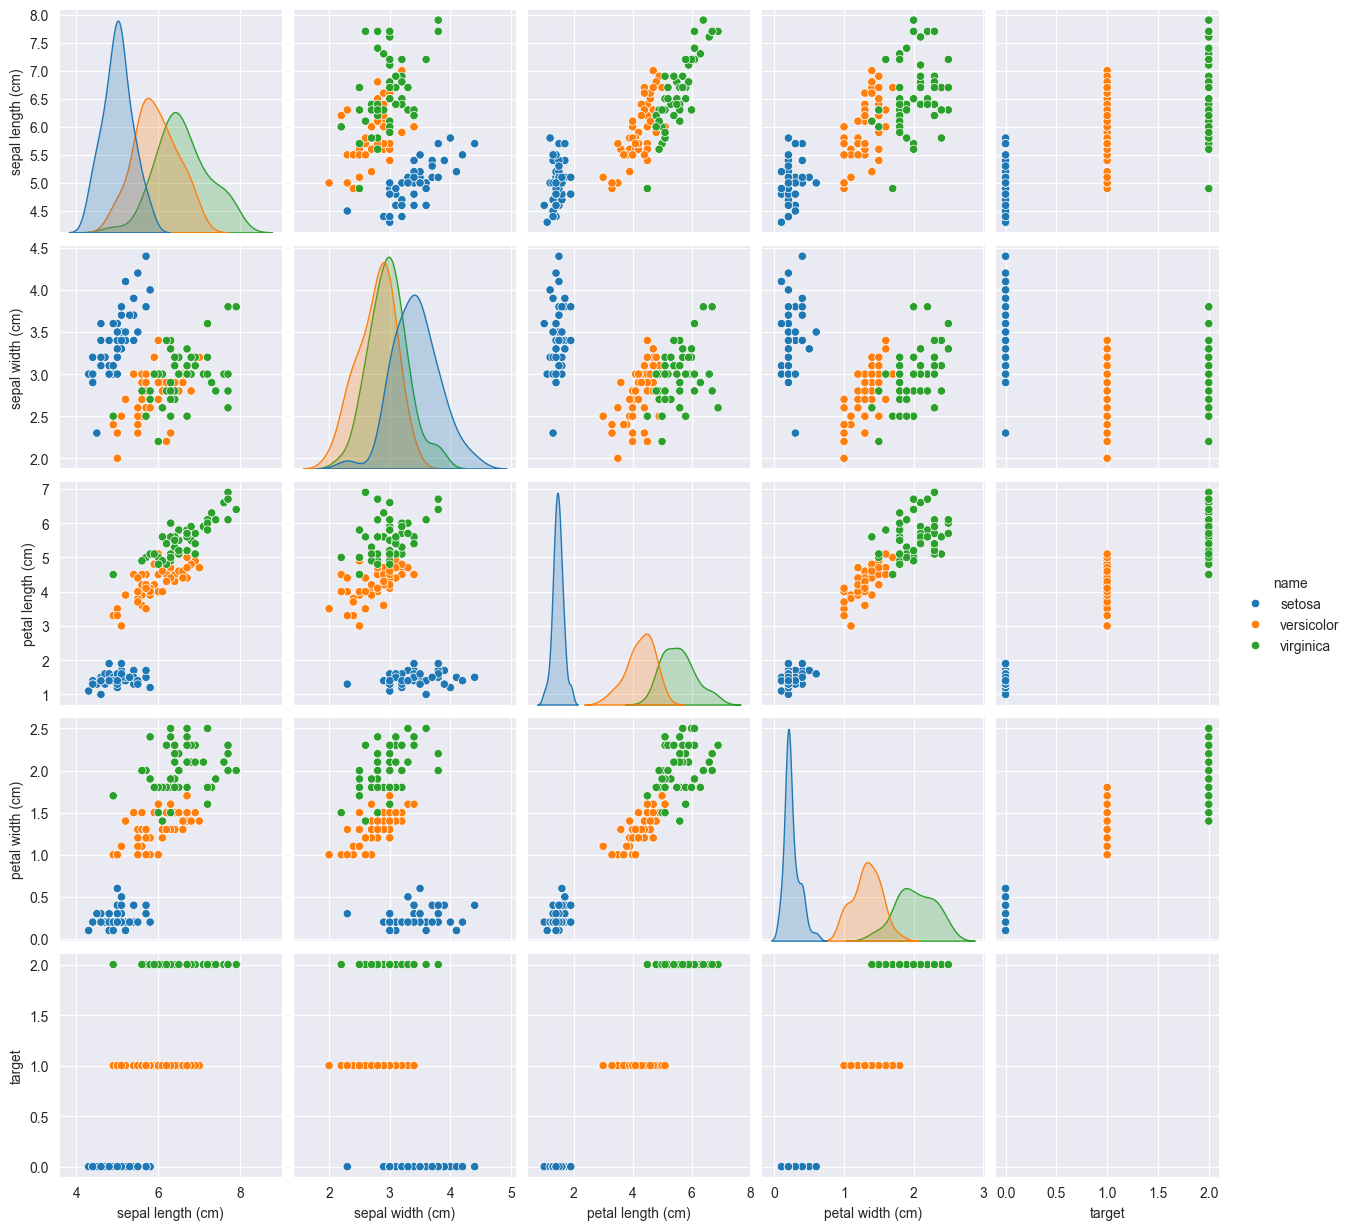

In [5]:
import seaborn as sns
sns.pairplot(df[df.columns], hue='name')

<Axes: >

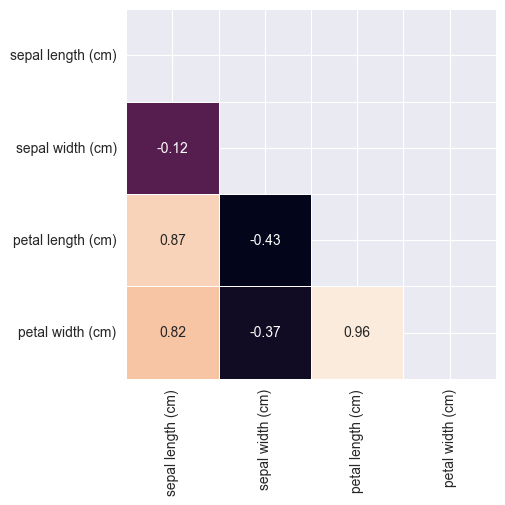

In [14]:
import numpy as np
corr = df[iris.feature_names].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)